In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

We are Considering Apple stocks data from Jan 2022 to Jan 2023 (one year)

In [3]:
# Define the stock symbol and time period
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

In [4]:
# Fetch historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [7]:
stock_data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056961,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225067,86709100
2022-01-10,169.080002,172.500000,168.169998,172.190002,170.244843,106765600
2022-01-11,172.320007,175.179993,170.820007,175.080002,173.102188,76138300
2022-01-12,176.119995,177.179993,174.820007,175.529999,173.547089,74805200
2022-01-13,175.779999,176.619995,171.789993,172.190002,170.244843,84505800


In [8]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.802709,156.907809,152.691315,154.835060,153.523795,8.791038e+07
std,13.063034,12.937389,13.108058,13.056081,12.774159,2.365699e+07
min,127.989998,129.949997,125.870003,126.040001,125.339417,3.519590e+07
25%,144.330002,146.709999,142.324997,144.645004,143.656754,7.229740e+07
50%,154.009995,155.830002,151.940002,154.089996,152.767517,8.373720e+07
75%,166.189995,167.989998,164.044998,165.915001,164.352905,9.693705e+07
max,182.630005,182.940002,179.119995,182.009995,179.953873,1.826020e+08


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


### Data Pre-Processing

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Extract the closing prices
closing_prices = stock_data['Close'].values.reshape(-1, 1)

In [11]:
closing_prices

array([[182.00999451],
       [179.69999695],
       [174.91999817],
       [172.        ],
       [172.16999817],
       [172.19000244],
       [175.08000183],
       [175.52999878],
       [172.19000244],
       [173.07000732],
       [169.80000305],
       [166.22999573],
       [164.50999451],
       [162.41000366],
       [161.61999512],
       [159.77999878],
       [159.69000244],
       [159.22000122],
       [170.33000183],
       [174.77999878],
       [174.61000061],
       [175.83999634],
       [172.8999939 ],
       [172.38999939],
       [171.66000366],
       [174.83000183],
       [176.27999878],
       [172.11999512],
       [168.63999939],
       [168.88000488],
       [172.78999329],
       [172.55000305],
       [168.88000488],
       [167.30000305],
       [164.32000732],
       [160.07000732],
       [162.74000549],
       [164.8500061 ],
       [165.11999512],
       [163.19999695],
       [166.55999756],
       [166.22999573],
       [163.16999817],
       [159

In [12]:
# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_prices = scaler.fit_transform(closing_prices)

In [13]:
normalized_prices

array([[1.        ],
       [0.95872793],
       [0.87332505],
       [0.82115427],
       [0.82419158],
       [0.82454899],
       [0.87618379],
       [0.88422375],
       [0.82454899],
       [0.84027178],
       [0.78184755],
       [0.71806324],
       [0.68733246],
       [0.64981252],
       [0.63569766],
       [0.60282297],
       [0.60121503],
       [0.59281765],
       [0.79131688],
       [0.87082372],
       [0.86778641],
       [0.88976239],
       [0.8372342 ],
       [0.82812228],
       [0.81507965],
       [0.87171711],
       [0.89762379],
       [0.82329819],
       [0.76112209],
       [0.7654102 ],
       [0.83526885],
       [0.83098102],
       [0.7654102 ],
       [0.73718076],
       [0.68393802],
       [0.60800447],
       [0.65570857],
       [0.69340735],
       [0.69823117],
       [0.66392711],
       [0.72395929],
       [0.71806324],
       [0.66339113],
       [0.59424702],
       [0.56101492],
       [0.65946043],
       [0.58031101],
       [0.512

### Train Test Split

In [15]:
# Define the training and testing set sizes
train_size = int(len(normalized_prices) * 0.8)
test_size = len(normalized_prices) - train_size

In [17]:
print(train_size,test_size)

200 51


In [18]:

# Split the data
train_data, test_data = normalized_prices[0:train_size, :], normalized_prices[train_size:len(normalized_prices), :]


Here, a function create_sequences is defined to generate sequences for the LSTM model. The function takes a dataset and a parameter time_steps, which defines how many past time steps the model should consider for each prediction.

For each data point in the dataset, the function creates a sequence of time_steps length as input (X) and the next value as the output (y). This helps the LSTM model learn temporal dependencies in the data.

In our example, time_steps is set to 30, meaning the model will use the past 30 days' closing prices to predict the next closing price. You can adjust this value based on the characteristics of your data.



In [20]:
#train_data

In [21]:
# Define a function to create sequences for LSTM
def create_sequences(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)


Now, X_train and y_train contain the sequences for the training set, and X_test and y_test contain the sequences for the testing set

In [23]:
# Create sequences for LSTM
time_steps = 30  # You can adjust this value
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

In [24]:
X_train

array([[1.        , 0.95872793, 0.87332505, ..., 0.82329819, 0.76112209,
        0.7654102 ],
       [0.95872793, 0.87332505, 0.82115427, ..., 0.76112209, 0.7654102 ,
        0.83526885],
       [0.87332505, 0.82115427, 0.82419158, ..., 0.7654102 , 0.83526885,
        0.83098102],
       ...,
       [0.57030569, 0.53189209, 0.50902271, ..., 0.23119522, 0.21976053,
        0.30284092],
       [0.53189209, 0.50902271, 0.53457226, ..., 0.21976053, 0.30284092,
        0.22047535],
       [0.50902271, 0.53457226, 0.50777218, ..., 0.30284092, 0.22047535,
        0.2924782 ]])

In [25]:
y_train

array([0.83526885, 0.83098102, 0.7654102 , 0.73718076, 0.68393802,
       0.60800447, 0.65570857, 0.69340735, 0.69823117, 0.66392711,
       0.72395929, 0.71806324, 0.66339113, 0.59424702, 0.56101492,
       0.65946043, 0.58031101, 0.512596  , 0.43916378, 0.51902803,
       0.59942825, 0.61783095, 0.67786313, 0.70287669, 0.76433824,
       0.78917297, 0.8581385 , 0.86975176, 0.88547456, 0.94550673,
       0.9242453 , 0.86778641, 0.86242634, 0.93621596, 0.87582638,
       0.81811696, 0.8236556 , 0.78702877, 0.70948729, 0.74361278,
       0.79256741, 0.70126848, 0.69733805, 0.73896726, 0.73592995,
       0.72145796, 0.63873497, 0.6582099 , 0.54958023, 0.54547096,
       0.67178851, 0.56476678, 0.57030569, 0.5974629 , 0.71431138,
       0.54904425, 0.55815618, 0.4648919 , 0.5086653 , 0.365553  ,
       0.29515809, 0.37645171, 0.34840083, 0.4145079 , 0.26407018,
       0.20207265, 0.20636049, 0.30498484, 0.25585137, 0.25871011,
       0.31695551, 0.42165448, 0.40736105, 0.40503856, 0.44970

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 30)
(21, 30)
(170,)
(21,)


### LSTM

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [29]:
#our custom model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, epochs=50, batch_size=32,verbose=True)

Epoch 1/50
6/6 [==============================] - 7s 45ms/step - loss: 0.2106
Epoch 2/50
6/6 [==============================] - 0s 42ms/step - loss: 0.0520
Epoch 3/50
6/6 [==============================] - 0s 41ms/step - loss: 0.0376
Epoch 4/50
6/6 [==============================] - 0s 44ms/step - loss: 0.0388
Epoch 5/50
6/6 [==============================] - 0s 42ms/step - loss: 0.0290
Epoch 6/50
6/6 [==============================] - 0s 43ms/step - loss: 0.0268
Epoch 7/50
6/6 [==============================] - 0s 42ms/step - loss: 0.0269
Epoch 8/50
6/6 [==============================] - 0s 41ms/step - loss: 0.0251
Epoch 9/50
6/6 [==============================] - 0s 41ms/step - loss: 0.0239
Epoch 10/50
6/6 [==============================] - 0s 42ms/step - loss: 0.0231
Epoch 11/50
6/6 [==============================] - 0s 44ms/step - loss: 0.0215
Epoch 12/50
6/6 [==============================] - 0s 46ms/step - loss: 0.0214
Epoch 13/50
6/6 [==============================] - 0s 43ms/st

In [33]:
predictions = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [34]:
predictions

array([[0.45283833],
       [0.43841738],
       [0.42900535],
       [0.4229499 ],
       [0.414813  ],
       [0.4021369 ],
       [0.3880207 ],
       [0.3737378 ],
       [0.3637514 ],
       [0.35917488],
       [0.35695264],
       [0.34865284],
       [0.3323359 ],
       [0.308572  ],
       [0.28092813],
       [0.2557033 ],
       [0.23238073],
       [0.21223871],
       [0.19403686],
       [0.17503607],
       [0.15827723]], dtype=float32)

### Model Valuation

In [35]:
from sklearn.metrics import mean_squared_error
import math

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 7.27501724432663


### Plotting results

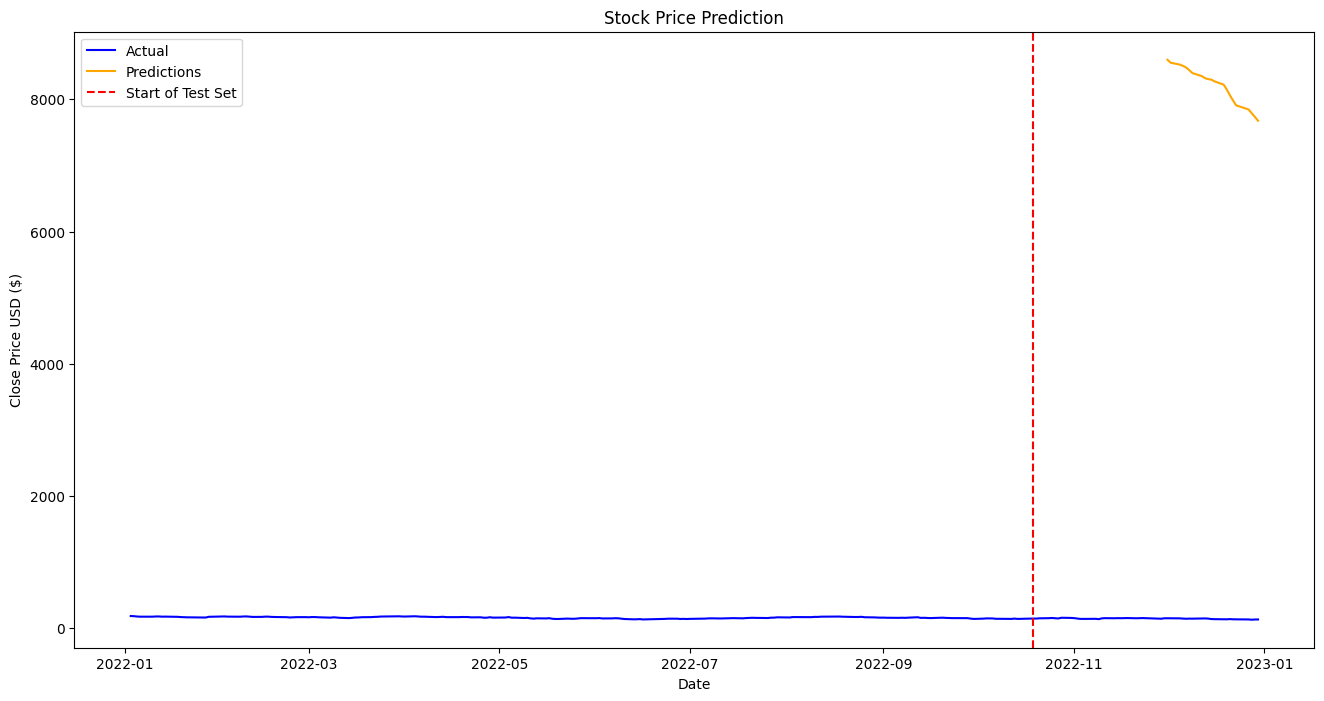

In [37]:
import matplotlib.pyplot as plt

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a DataFrame to hold the results
results_df = pd.DataFrame(index=stock_data.index)
results_df['Actual'] = np.nan
results_df['Predictions'] = np.nan
results_df.iloc[train_size+time_steps:train_size+time_steps+len(predictions), 0] = y_test_actual.flatten()
results_df.iloc[train_size+time_steps:train_size+time_steps+len(predictions), 1] = predictions.flatten()

# Plotting
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Plot actual and predicted values
plt.plot(stock_data['Close'], label='Actual', color='blue')
plt.plot(results_df['Predictions'], label='Predictions', color='orange')

# Highlight the test set region
plt.axvline(x=stock_data.index[train_size], linestyle='--', color='red', label='Start of Test Set')

plt.legend()
plt.show()
